In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.dpi']=300

In [48]:
# Importing Our MPG Dataset from Seaborn
mpg = sns.load_dataset('mpg')


In [49]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [50]:
# Checking our Data
mpg.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [51]:
# For getting index with nan
rows_with_nan = [index for index, row in mpg.iterrows() if row.isnull().any()]
print(rows_with_nan)

[32, 126, 330, 336, 354, 374]


In [52]:
mpg.drop(index=rows_with_nan,axis=1,inplace=True)

In [53]:
mpg.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [54]:
# Making Target
target = pd.Series(mpg['mpg'],name='mpg')

# Selecting and Making Feature
features = mpg[['horsepower','weight','displacement']]

In [55]:
target.head

<bound method NDFrame.head of 0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 392, dtype: float64>

In [56]:
features.head()

,horsepower,weight,displacement
0,130.0,3504,307.0
1,165.0,3693,350.0
2,150.0,3436,318.0
3,150.0,3433,304.0
4,140.0,3449,302.0


In [57]:
# Data Refininig
features.isna().sum()
## Nothing Found 

horsepower      0
weight          0
displacement    0
dtype: int64

In [58]:
# Splitting the Data into test datasets and train datasets
from sklearn.model_selection import train_test_split


In [59]:
# Normalization 
from sklearn.preprocessing import StandardScaler
scale_model = StandardScaler()
scaled_features = scale_model.fit_transform(features)
scaled_features = pd.DataFrame(scaled_features, columns=features.columns)

In [60]:
x_train,x_test,y_train,y_test = train_test_split(features,target,test_size=0.2 )
""" 0.2 means Splitting test data into 20% of original Data"""

' 0.2 means Splitting test data into 20% of original Data'

In [61]:
x_train.isna().sum()

horsepower      0
weight          0
displacement    0
dtype: int64

In [62]:
# IMporting our model for this Data sets
from sklearn.linear_model import LinearRegression

In [63]:
model = LinearRegression()

In [64]:
# fiting our Model
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [65]:
model.coef_

array([-0.03909686, -0.00502272, -0.00987028])

In [66]:
# Model Evaluation
y_pred = model.predict(x_test)

In [67]:
y_pred[:5]

array([13.7388617 ,  7.50610605, 23.87535438, 15.24913878, 19.65043291])

In [68]:
y_test[:5]

9      15.0
90     12.0
210    19.0
265    17.5
260    18.6
Name: mpg, dtype: float64

In [69]:
model.intercept_

44.35415478862289

In [70]:
## it shouldd +- 4.47

In [71]:
# Calculating the Accuracy of our Model
from sklearn.metrics import r2_score,mean_squared_error
acc = r2_score(y_test,y_pred)
print(acc*100)

73.8505598057449


In [72]:
features[:5]

,horsepower,weight,displacement
0,130.0,3504,307.0
1,165.0,3693,350.0
2,150.0,3436,318.0
3,150.0,3433,304.0
4,140.0,3449,302.0


In [73]:
target[:5]

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

In [74]:
# Calculating MSE
mse= mean_squared_error(y_test,y_pred)
print(np.sqrt(mse))

4.224208669376276


horsepower Corr Coeff: -0.78 


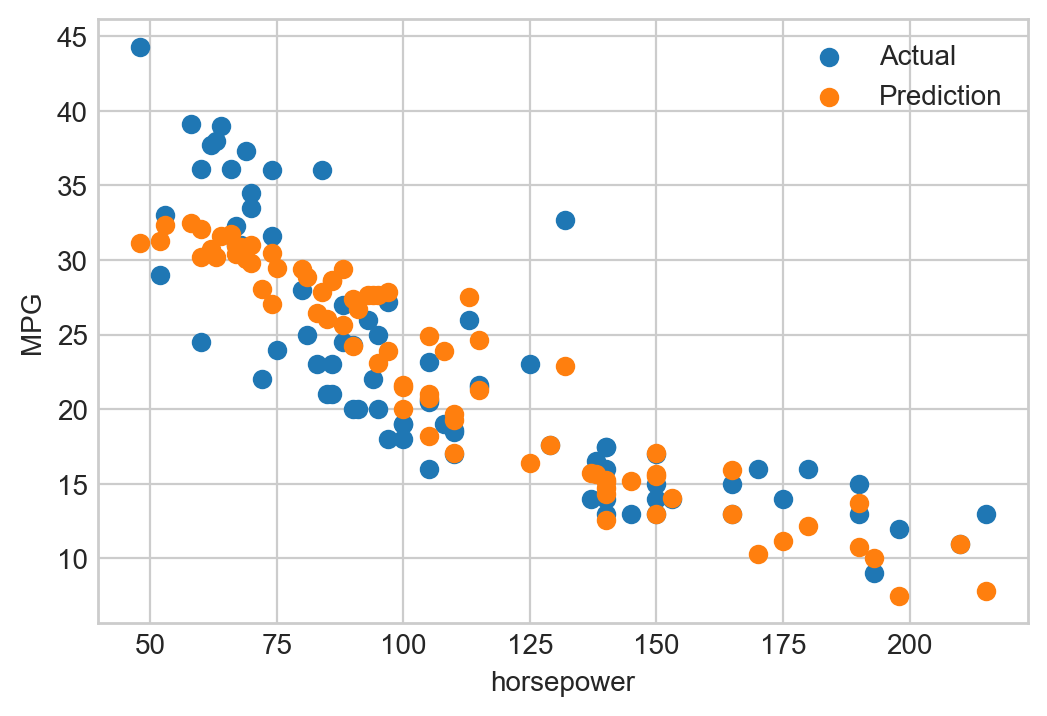

    weight Corr Coeff: -0.83 


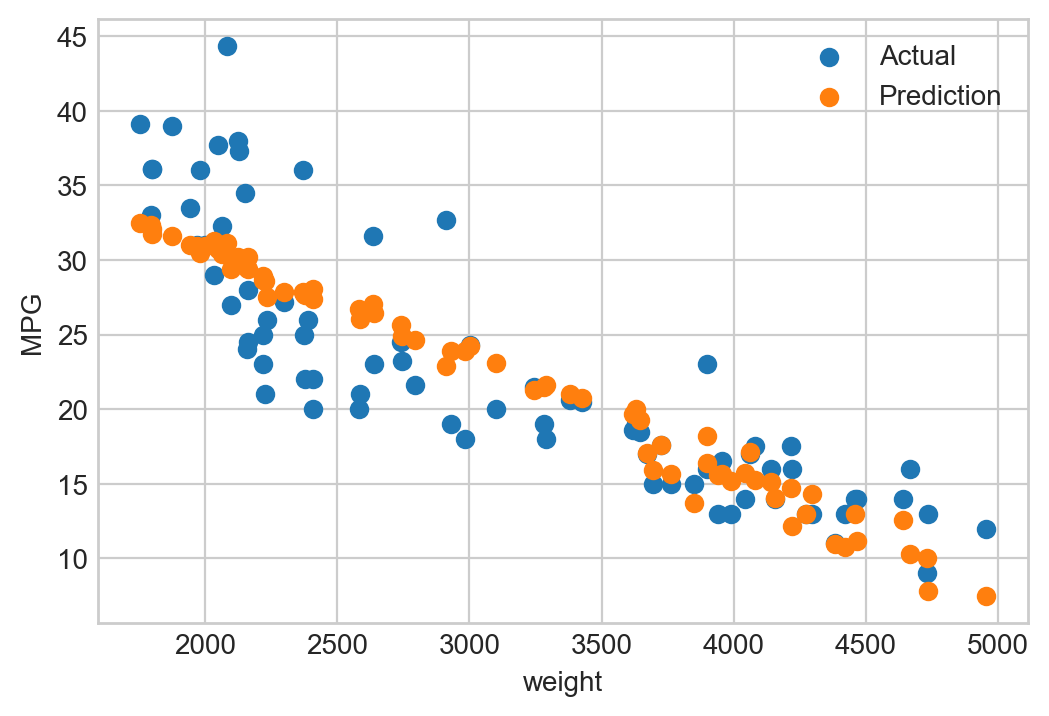

displacement Corr Coeff: -0.81 


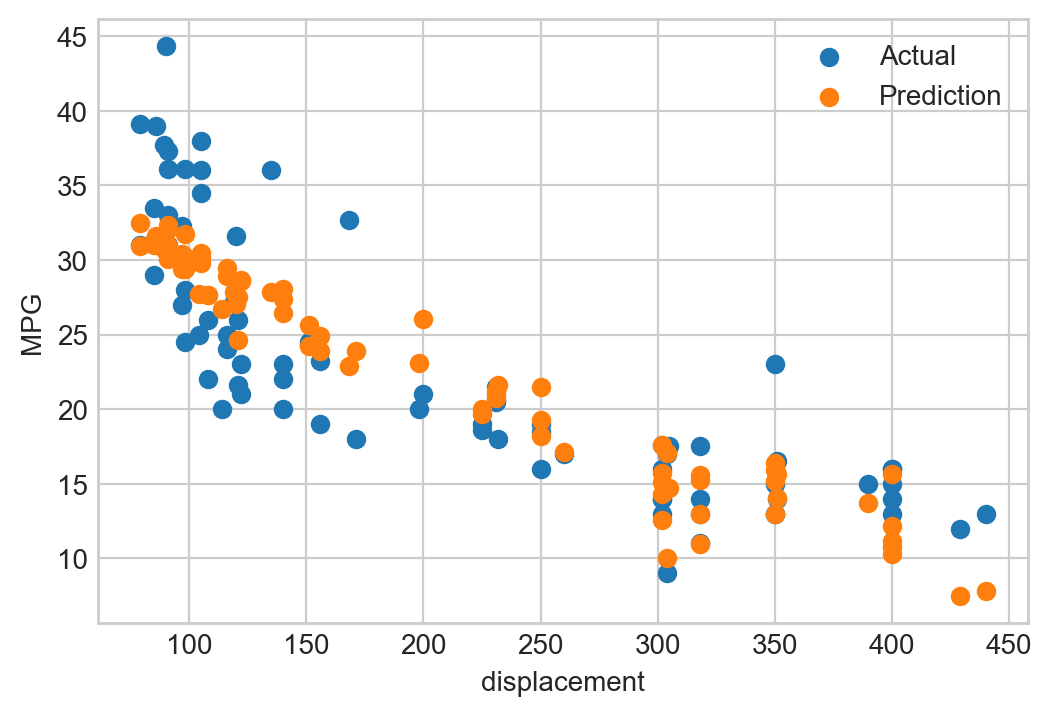

In [75]:
for col in scaled_features.columns:
    print(f"{col:>10} Corr Coeff: {np.corrcoef(scaled_features[col], target)[0][1]:>5.2f} ")
    plt.figure(dpi=200)
    plt.scatter(x_test[col], y_test, label='Actual')
    plt.scatter(x_test[col], y_pred, label='Prediction')
    plt.xlabel(col)
    plt.ylabel('MPG')
    plt.legend()
    plt.show()

In [76]:
# Now Saving Our Model
import pickle
fp = open('mpg_model.pkl', 'wb')
pickle.dump(model, fp)
fp.close()

In [77]:
x_train.head()

,horsepower,weight,displacement
169,100.0,2914,232.0
54,69.0,1613,72.0
31,95.0,2228,113.0
364,105.0,3725,350.0
273,97.0,2405,119.0


In [78]:
y_train.head()

169    20.0
54     35.0
31     25.0
364    26.6
273    23.9
Name: mpg, dtype: float64